# Data Preprocessing and Exploratory Data Analysis (EDA) in Pandas: Monthly Healthcare Call Distribution

In [ ]:
__author__ = "Cristian B. Jetomo"

### Implementation

In [ ]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Overview**

In this Jupyter notebook, we'll be exploring a dataset on **healthcare calls from April 2016 to February 2025**. Our goal is to understand patterns in healthcare service utilization during periods of emergency. Specifically, we want to examine the fluctuations in the total number of calls, including doctor consultations, health information requests, ambulance services, complaints, and inquiries about services. This analysis aims to evaluate the effectiveness of emergency response systems, focusing on how healthcare systems manage surges in demand during high-stress periods. By investigating spikes in call volumes, particularly during emergency periods, this analysis provides insights into the healthcare system's ability to manage such crisis and the areas that require improvement.


**Dataset Description**

The dataset contains aggregated healthcare call data for each month from April 2016 to February 2025. The data is categorized into the following key columns.
- *Total Number of Calls* - The total number of calls received across all service categories in a given month.
- *Total Number of Doctors Consultancy* - The number of calls made by individuals seeking consultations with doctors.
- *Number of Total Health Information* - The number of calls requesting general health information.
- *Number of Total Ambulance Information* - The number of calls related to ambulance services.
- *Number of Total Complaints* - The total number of complaints regarding the healthcare service.
- *Number of Calls To Know About The Service* - The number of calls made by
individuals seeking information about available healthcare services.

In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/chan's/Commissions/Python Tutorial Sessions (Aug 9, 16 2025)/resources/healthcare_calls.csv")
df.head(10)  # view first 10 rows

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
0,2025,Feb,155200,98964,3777,5773,3706,42980
1,2025,Jan,130982,87815,3217,4179,3178,32593
2,2024,Dec,133725,86832,3634,3735,3035,36489
3,2024,Nov,153698,93710,3010,4421,4133,48424
4,2024,Oct,214604,108207,6307,5792,8885,80804
5,2024,Sept,157686,94893,3683,5685,4286,40889
6,2024,Aug,168418,100902,6435,6628,5267,41964
7,2024,July,190861,121500,5444,7501,5040,51376
8,2024,June,169089,111573,6774,8330,5414,36998
9,2024,May,149502,102415,4982,8173,5037,28895


In [ ]:
# making sense of dataset structure
df.shape  # (nrows, ncols)

(107, 8)

In [ ]:
# get basic information about the dataset
df.info()  # !! Answer Me!! how do we read this information?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       107 non-null    int64 
 1   Month                                      107 non-null    object
 2   Total Number of Calls                      107 non-null    int64 
 3   Total Number of Doctors Consultancy        107 non-null    int64 
 4   Number of Total Health Information         107 non-null    int64 
 5   Number of Total Ambulance Information      107 non-null    int64 
 6   Number of Total Complaints                 107 non-null    int64 
 7   Number of Calls To Know About The Service  107 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.8+ KB


In [ ]:
# access specific information in pandas
df.iloc[102, :]

,102
Year,2016
Month,Aug
Total Number of Calls,142400
Total Number of Doctors Consultancy,112831
Number of Total Health Information,12184
Number of Total Ambulance Information,980
Number of Total Complaints,340
Number of Calls To Know About The Service,16065


In [ ]:
# !! Answer Me !! How many calls are for Doctors Consultancy and Health Information in December 2024?
df[(df['Month'] == 'Oct') & (df['Year'] == 2024)].loc[:, ['Total Number of Doctors Consultancy', "Number of Total Health Information"]].sum(axis=1)

,0
4,114514


## Data Preprocessing
Notice that the Year and Month column have a dtype of integer and object (string), respectively. Using these columns as is will not give a good chronological analysis of our calls. Hence, we need to combine and convert the Year and Month columns into a Datetime format.

In [ ]:
df['Month-Year'] = df['Month'] + " " + df['Year'].astype(str)
df['Month-Year']

,Month-Year
0,Feb 2025
1,Jan 2025
2,Dec 2024
3,Nov 2024
4,Oct 2024
...,...
102,Aug 2016
103,July 2016
104,June 2016
105,May 2016


In [ ]:
# combine month and year as a single column
df['Month-Year'] = df['Month'] + " " + df['Year'].astype(str)

# change month-year column to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b %Y', errors='coerce')

# check for converting errors
df[df['Month-Year'].isna()]['Month'].unique()  # sept, july, and june months results to error

array(['Sept', 'July', 'June'], dtype=object)

In [ ]:
# substituting months
df['Month'] = df['Month'].replace({'Sept': 'Sep',
                                   'July': 'Jul',
                                   'June': 'Jun'})

# combine month and year as a single column
df['Month-Year'] = df['Month'] + " " + df['Year'].astype(str)

# change month-year column to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b %Y', errors='coerce')

df['Month-Year'].isna().sum()  # no more NaN/error values

np.int64(0)

In [ ]:
df['Month-Year']

,Month-Year
0,2025-02-01
1,2025-01-01
2,2024-12-01
3,2024-11-01
4,2024-10-01
...,...
102,2016-08-01
103,2016-07-01
104,2016-06-01
105,2016-05-01


In [ ]:
True == 1, False == 0

(True, True)

In [ ]:
df.info()  # !!Answer Me!! what's different here from the previous info?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Year                                       107 non-null    int64         
 1   Month                                      107 non-null    object        
 2   Total Number of Calls                      107 non-null    int64         
 3   Total Number of Doctors Consultancy        107 non-null    int64         
 4   Number of Total Health Information         107 non-null    int64         
 5   Number of Total Ambulance Information      107 non-null    int64         
 6   Number of Total Complaints                 107 non-null    int64         
 7   Number of Calls To Know About The Service  107 non-null    int64         
 8   Month-Year                                 107 non-null    datetime64[ns]
dtypes: datetime64[ns](1), 

In [ ]:
# sort values by Month-Date column

df.sort_values(by='Month-Year', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service,Month-Year
0,2016,Apr,51432,43885,3175,220,77,4075,2016-04-01
1,2016,May,166635,137326,12118,925,439,15827,2016-05-01
2,2016,Jun,186433,152580,14887,856,473,17637,2016-06-01
3,2016,Jul,145061,116686,11831,922,404,15218,2016-07-01
4,2016,Aug,142400,112831,12184,980,340,16065,2016-08-01
...,...,...,...,...,...,...,...,...,...
102,2024,Oct,214604,108207,6307,5792,8885,80804,2024-10-01
103,2024,Nov,153698,93710,3010,4421,4133,48424,2024-11-01
104,2024,Dec,133725,86832,3634,3735,3035,36489,2024-12-01
105,2025,Jan,130982,87815,3217,4179,3178,32593,2025-01-01


## Describing the Data using Summary Statistics, Distribution, and Correlation

Let's now look at the descriptive statistics of our data.

In [ ]:
df.describe()

,Year,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service,Month-Year
count,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107
mean,2020.205607,2.340316e+05,1.544553e+05,15714.728972,9240.317757,6924.457944,47509.102804,2020-08-31 05:22:59.439252224
min,2016.000000,5.143200e+04,3.816200e+04,3010.000000,220.000000,77.000000,4075.000000,2016-04-01 00:00:00
25%,2018.000000,9.918850e+04,6.081800e+04,6858.000000,836.000000,697.000000,18536.500000,2018-06-16 00:00:00
50%,2020.000000,1.424000e+05,9.489300e+04,10841.000000,4734.000000,4133.000000,28895.000000,2020-09-01 00:00:00
75%,2022.000000,2.025520e+05,1.215265e+05,13291.000000,8658.500000,8262.000000,45822.500000,2022-11-16 00:00:00
max,2025.000000,2.329457e+06,1.703100e+06,173306.000000,91751.000000,59760.000000,342434.000000,2025-02-01 00:00:00
std,2.601662,3.697001e+05,2.681351e+05,23104.165341,15330.680874,10484.201602,61227.797516,NaN


In [ ]:
df.columns  # shows the header of the dataframe
metrics = df.columns[2:8]  # filter headers to metrics columns

In [ ]:
# describe the metrics only
df[metrics].describe()

,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
count,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000
mean,2.340316e+05,1.544553e+05,15714.728972,9240.317757,6924.457944,47509.102804
std,3.697001e+05,2.681351e+05,23104.165341,15330.680874,10484.201602,61227.797516
min,5.143200e+04,3.816200e+04,3010.000000,220.000000,77.000000,4075.000000
25%,9.918850e+04,6.081800e+04,6858.000000,836.000000,697.000000,18536.500000
50%,1.424000e+05,9.489300e+04,10841.000000,4734.000000,4133.000000,28895.000000
75%,2.025520e+05,1.215265e+05,13291.000000,8658.500000,8262.000000,45822.500000
max,2.329457e+06,1.703100e+06,173306.000000,91751.000000,59760.000000,342434.000000


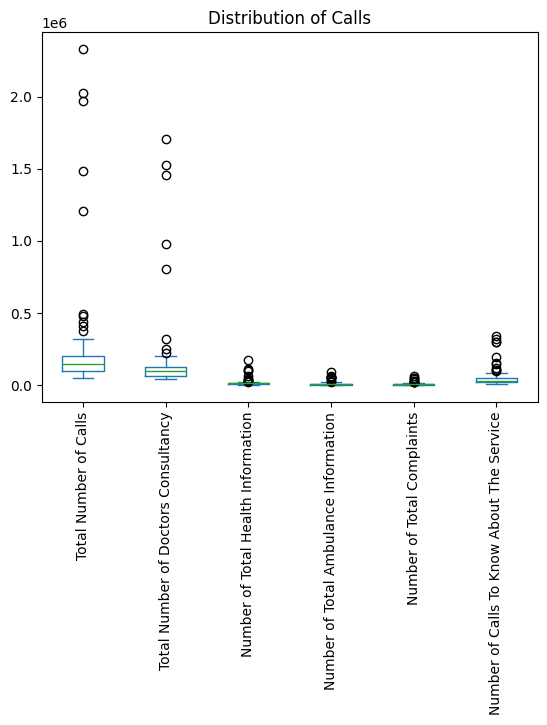

In [ ]:
# plot a boxplot for all metric columns
df[metrics].plot(kind='box')
plt.xticks(rotation=90)
plt.title("Distribution of Calls")

plt.show()

Notice that the boxplots of the metrics have different scales. Moreover, the distribution of values per metric are not clearly observed due to the outliers. To address this, we can normalize the values of each metric/column just to observe the general distribution and remove the outliers for more clear visualization.

In [ ]:
normalized_df_metrics = (df[metrics] - df[metrics].mean())/df[metrics].std()  # standard scaling
normalized_df_metrics.plot.box(showfliers=False, vert=True)  # set showfliers=False to remove outliers
# plt.xticks(rotation=90)
plt.title("Normalized Distribution of Calls")
plt.show()

NameError: name 'df' is not defined

In [ ]:
df[metrics].corr()  # check for correlation between metrics

,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
Total Number of Calls,1.000000,0.994481,0.924721,0.891041,0.871245,0.962238
Total Number of Doctors Consultancy,0.994481,1.000000,0.904190,0.848324,0.827180,0.930864
Number of Total Health Information,0.924721,0.904190,1.000000,0.820058,0.836434,0.899339
Number of Total Ambulance Information,0.891041,0.848324,0.820058,1.000000,0.933792,0.946049
Number of Total Complaints,0.871245,0.827180,0.836434,0.933792,1.000000,0.917892
Number of Calls To Know About The Service,0.962238,0.930864,0.899339,0.946049,0.917892,1.000000


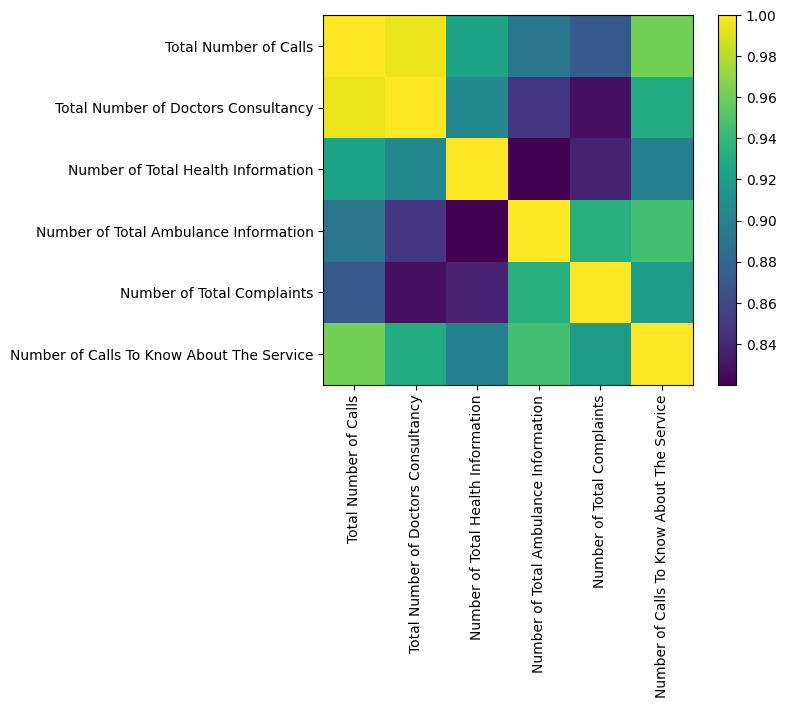

In [ ]:
plt.imshow(df[metrics].corr(),
           cmap='viridis')  # show as an image

# change the x- and y-tick labels
plt.xticks(range(len(metrics)), metrics, rotation=90)
plt.yticks(range(len(metrics)), metrics)
plt.colorbar()  # add a colorbar
plt.show()

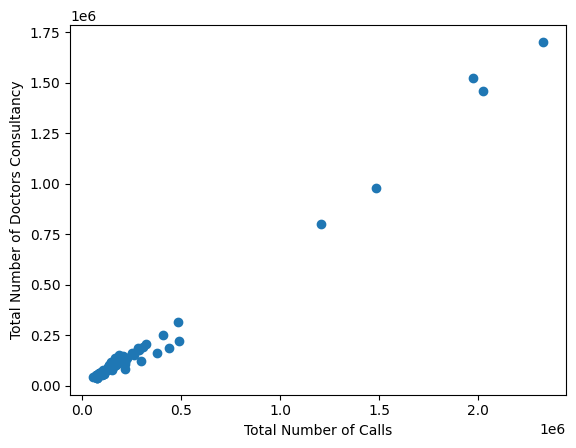

In [ ]:
# scatter plot between calls and consultancy

plt.scatter(df['Total Number of Calls'], df['Total Number of Doctors Consultancy'])
plt.xlabel('Total Number of Calls')
plt.ylabel('Total Number of Doctors Consultancy')
plt.show()

## Digging Deep on Groups and Trends

In this part, we want to gain some insights on the trends (if available) from our dataset: in general or specific to some groups.

Firstly, we want to know how much of each call type are there in our data. We take note that the *Total Number of Calls* column gives us the sum of call numbers across all call types.

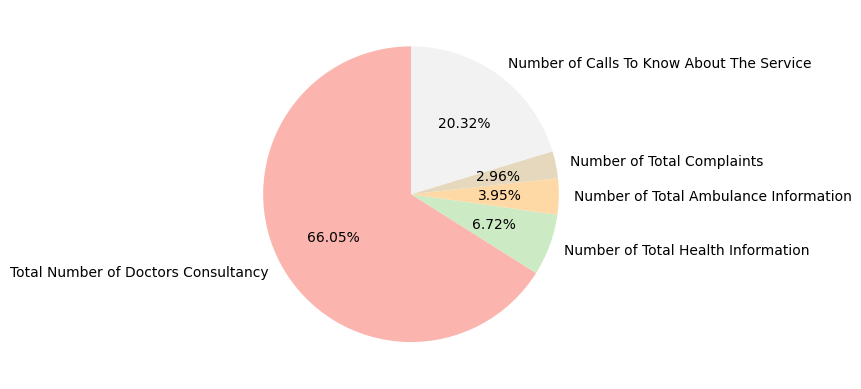

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, to_rgba
from matplotlib import colormaps as cm

# start_color = to_rgba("#2C7874")
# end_color = to_rgba("#E27C52")

# cmap = LinearSegmentedColormap.from_list('jaria_ganda', [start_color, end_color])

cmap = cm.get_cmap('Pastel1')

# pie chart of call type distribution
df[metrics[1:]].sum().plot(kind='pie', autopct='%1.2f%%', cmap=cmap, startangle=90);

As observed, majority of our calls are for doctors consultation (\~66%), followed by service inquiry (\~20%), and the least being complaints (\~3%).

Now, since we have some information on the calls on a monthly basis, we can look into the trend of these values.

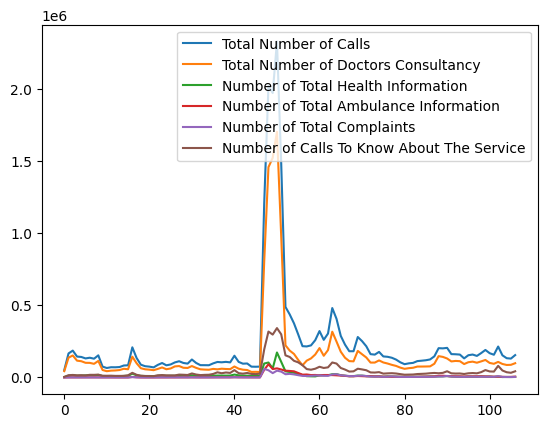

In [ ]:
df[metrics].plot(kind='line');

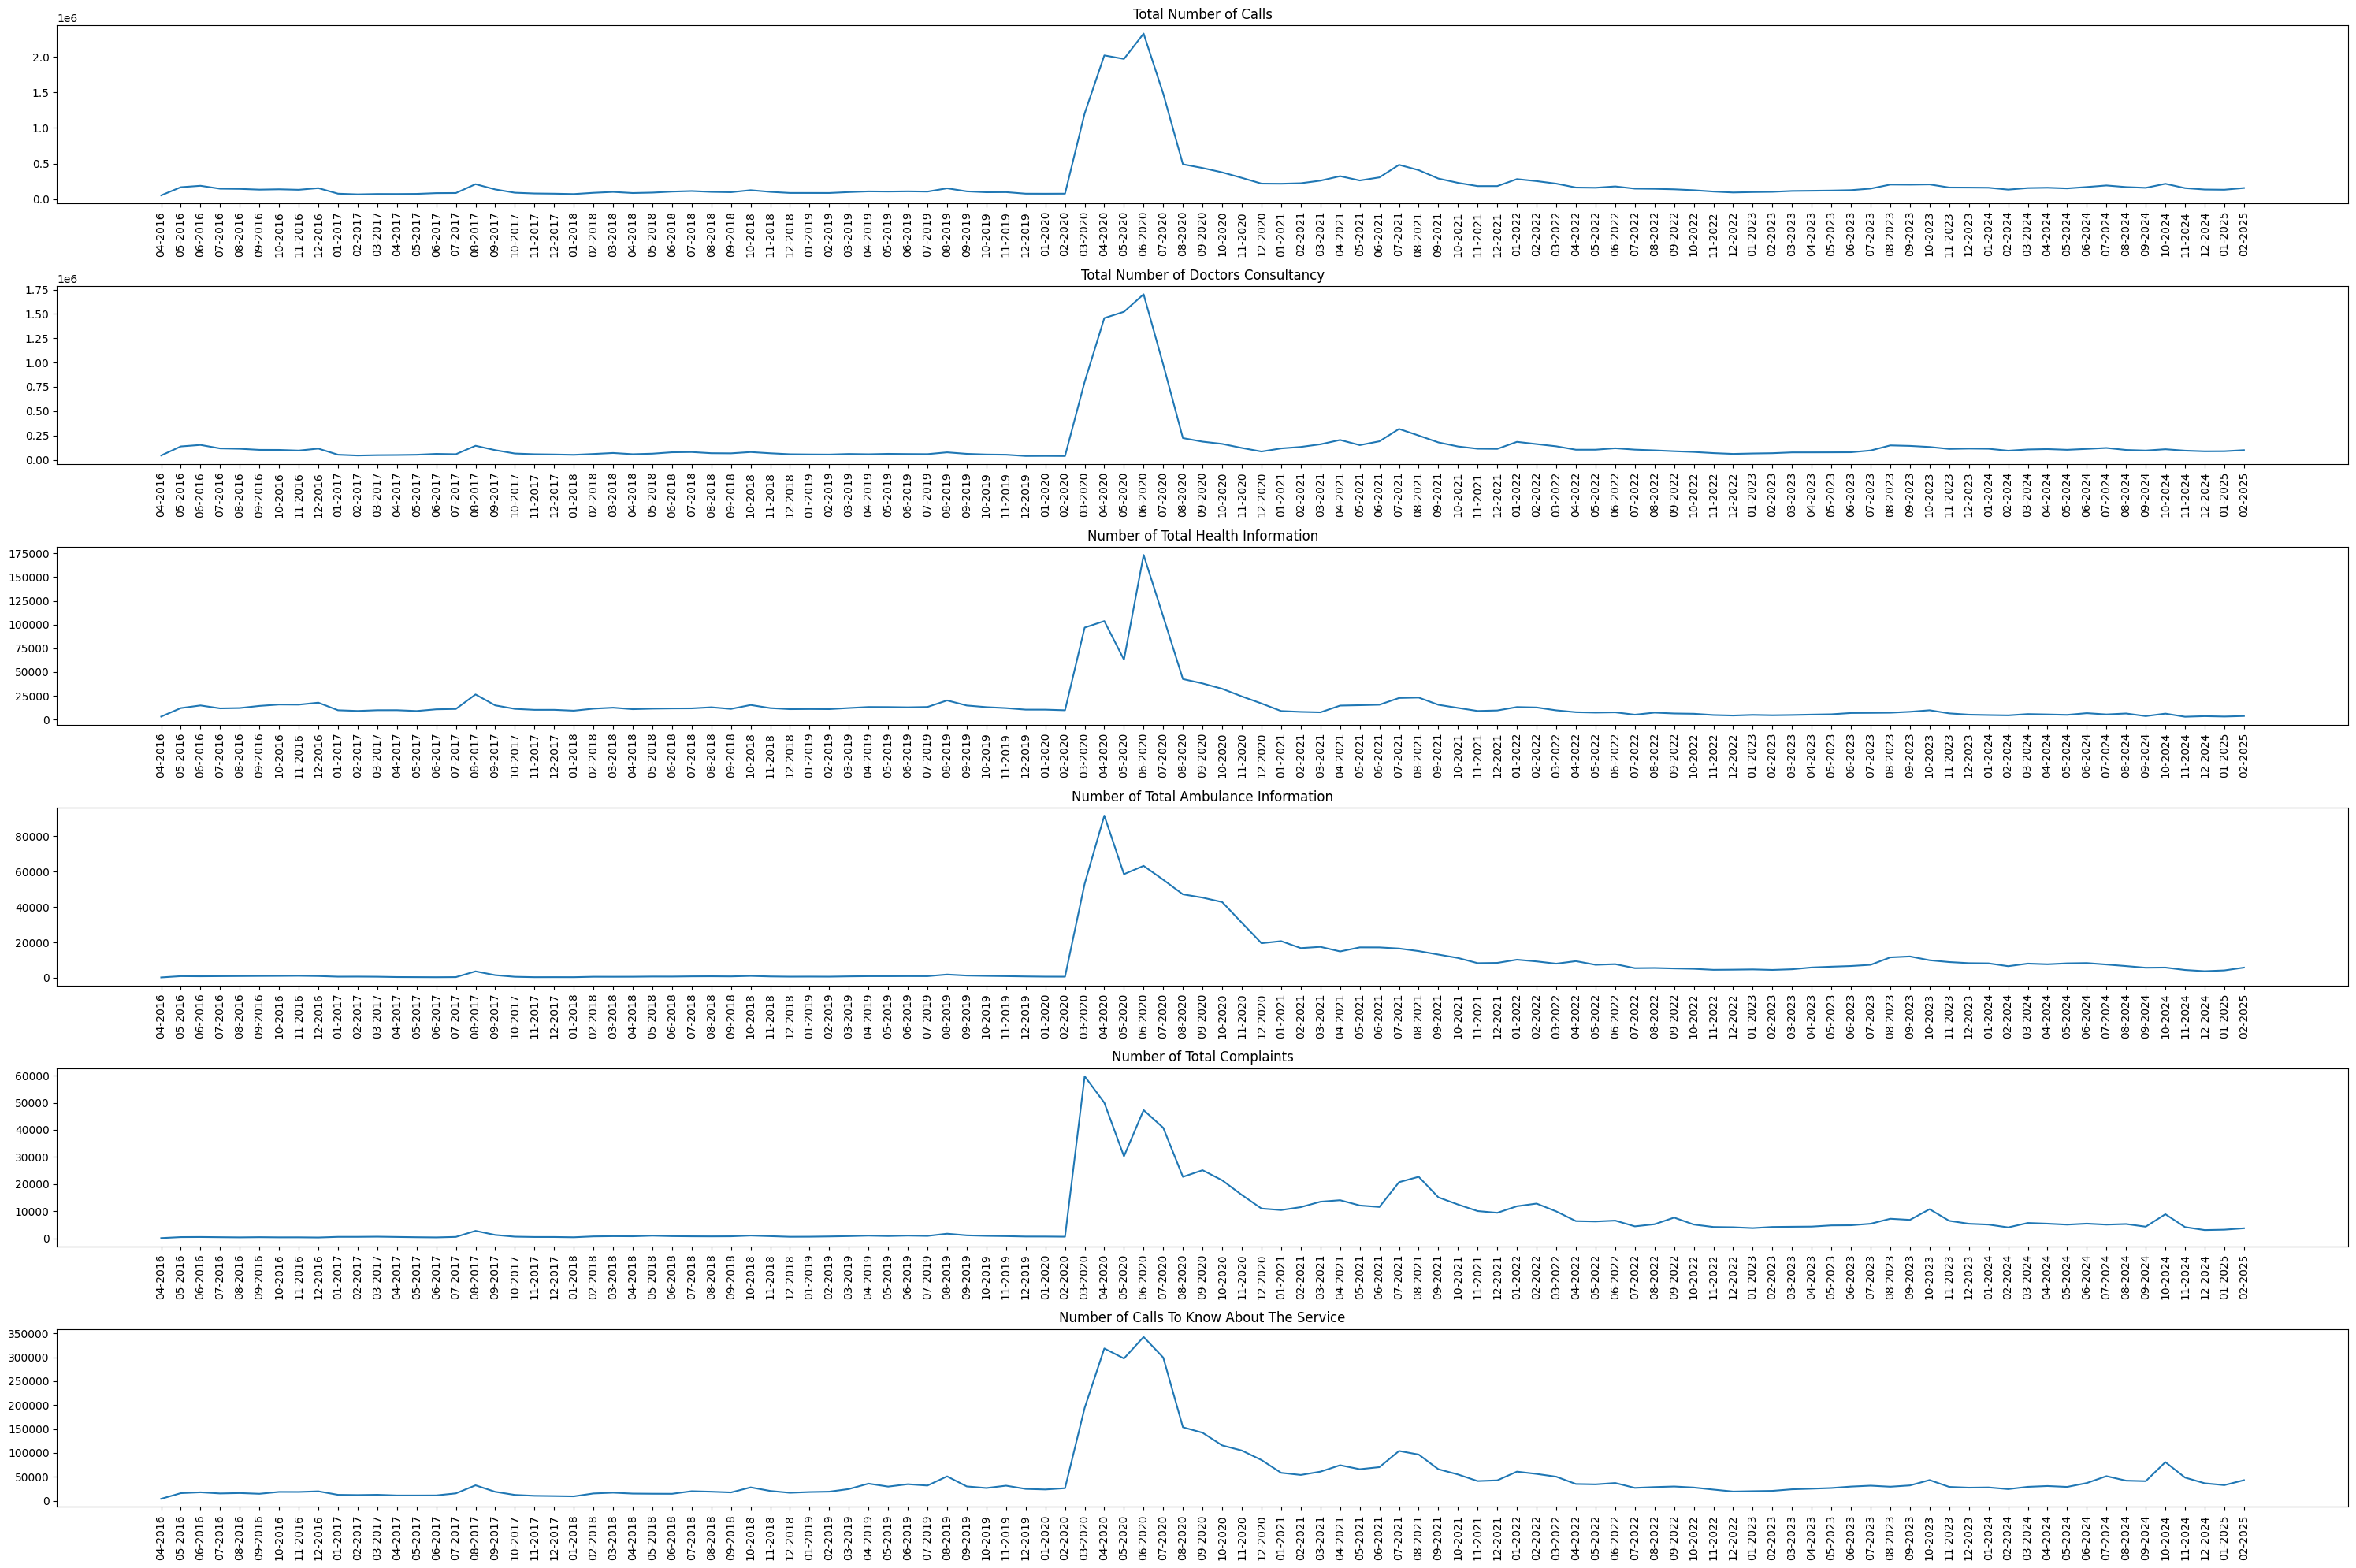

In [ ]:
fig, axs = plt.subplots(6, 1, figsize=(30, 20), sharex=False)
axs = axs.flatten()

for i in range(len(axs)):
  df[metrics[i]].plot(ax=axs[i], kind='line')
  axs[i].set_xticks(np.arange(len(df['Month-Year'])), df['Month-Year'].dt.strftime('%m-%Y'), rotation=90)
  axs[i].set_title(metrics[i])

plt.tight_layout()
plt.show()

Notice that all call types have a significant inflation in the year 2020-2021. These values are what's causing the imbalanced boxplots above.

Zooming in on the 2020-2021 values ...

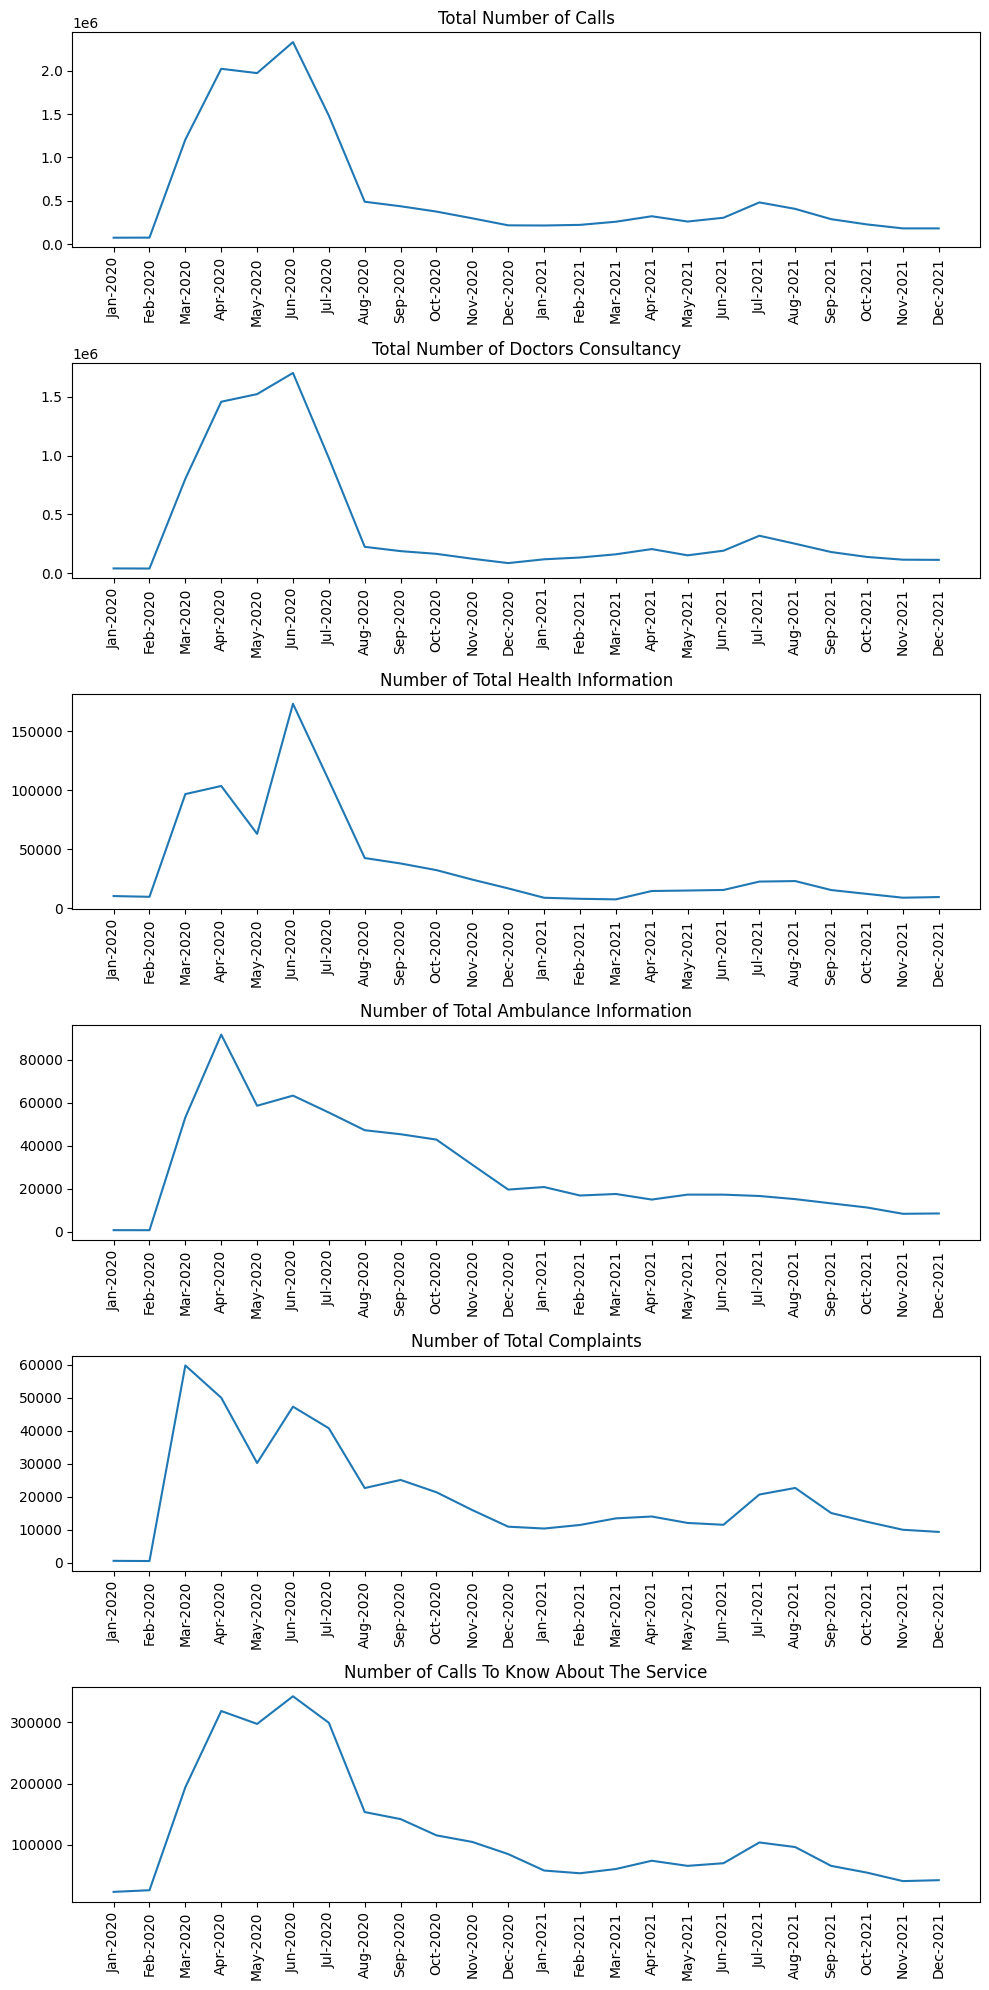

In [ ]:
# filter data to 2020-2021

df_20_21 = df[df['Year'].isin([2020, 2021])].reset_index(drop=True)

fig, axs = plt.subplots(6, 1, figsize=(10, 20))

for i in range(len(axs)):
  df_20_21[metrics[i]].plot(ax=axs[i], kind='line')
  axs[i].set_xticks(np.arange(len(df_20_21['Month-Year'])), df_20_21['Month-Year'].dt.strftime('%b-%Y'), rotation=90)
  axs[i].set_title(metrics[i])

plt.tight_layout()
plt.show()

Notice that the 2020 values affects our data more than the 2021 values. This interrupts our analysis, especially on finding trends and patterns in terms of the number of calls. For this, we remove the 2020 values in our next analysis.

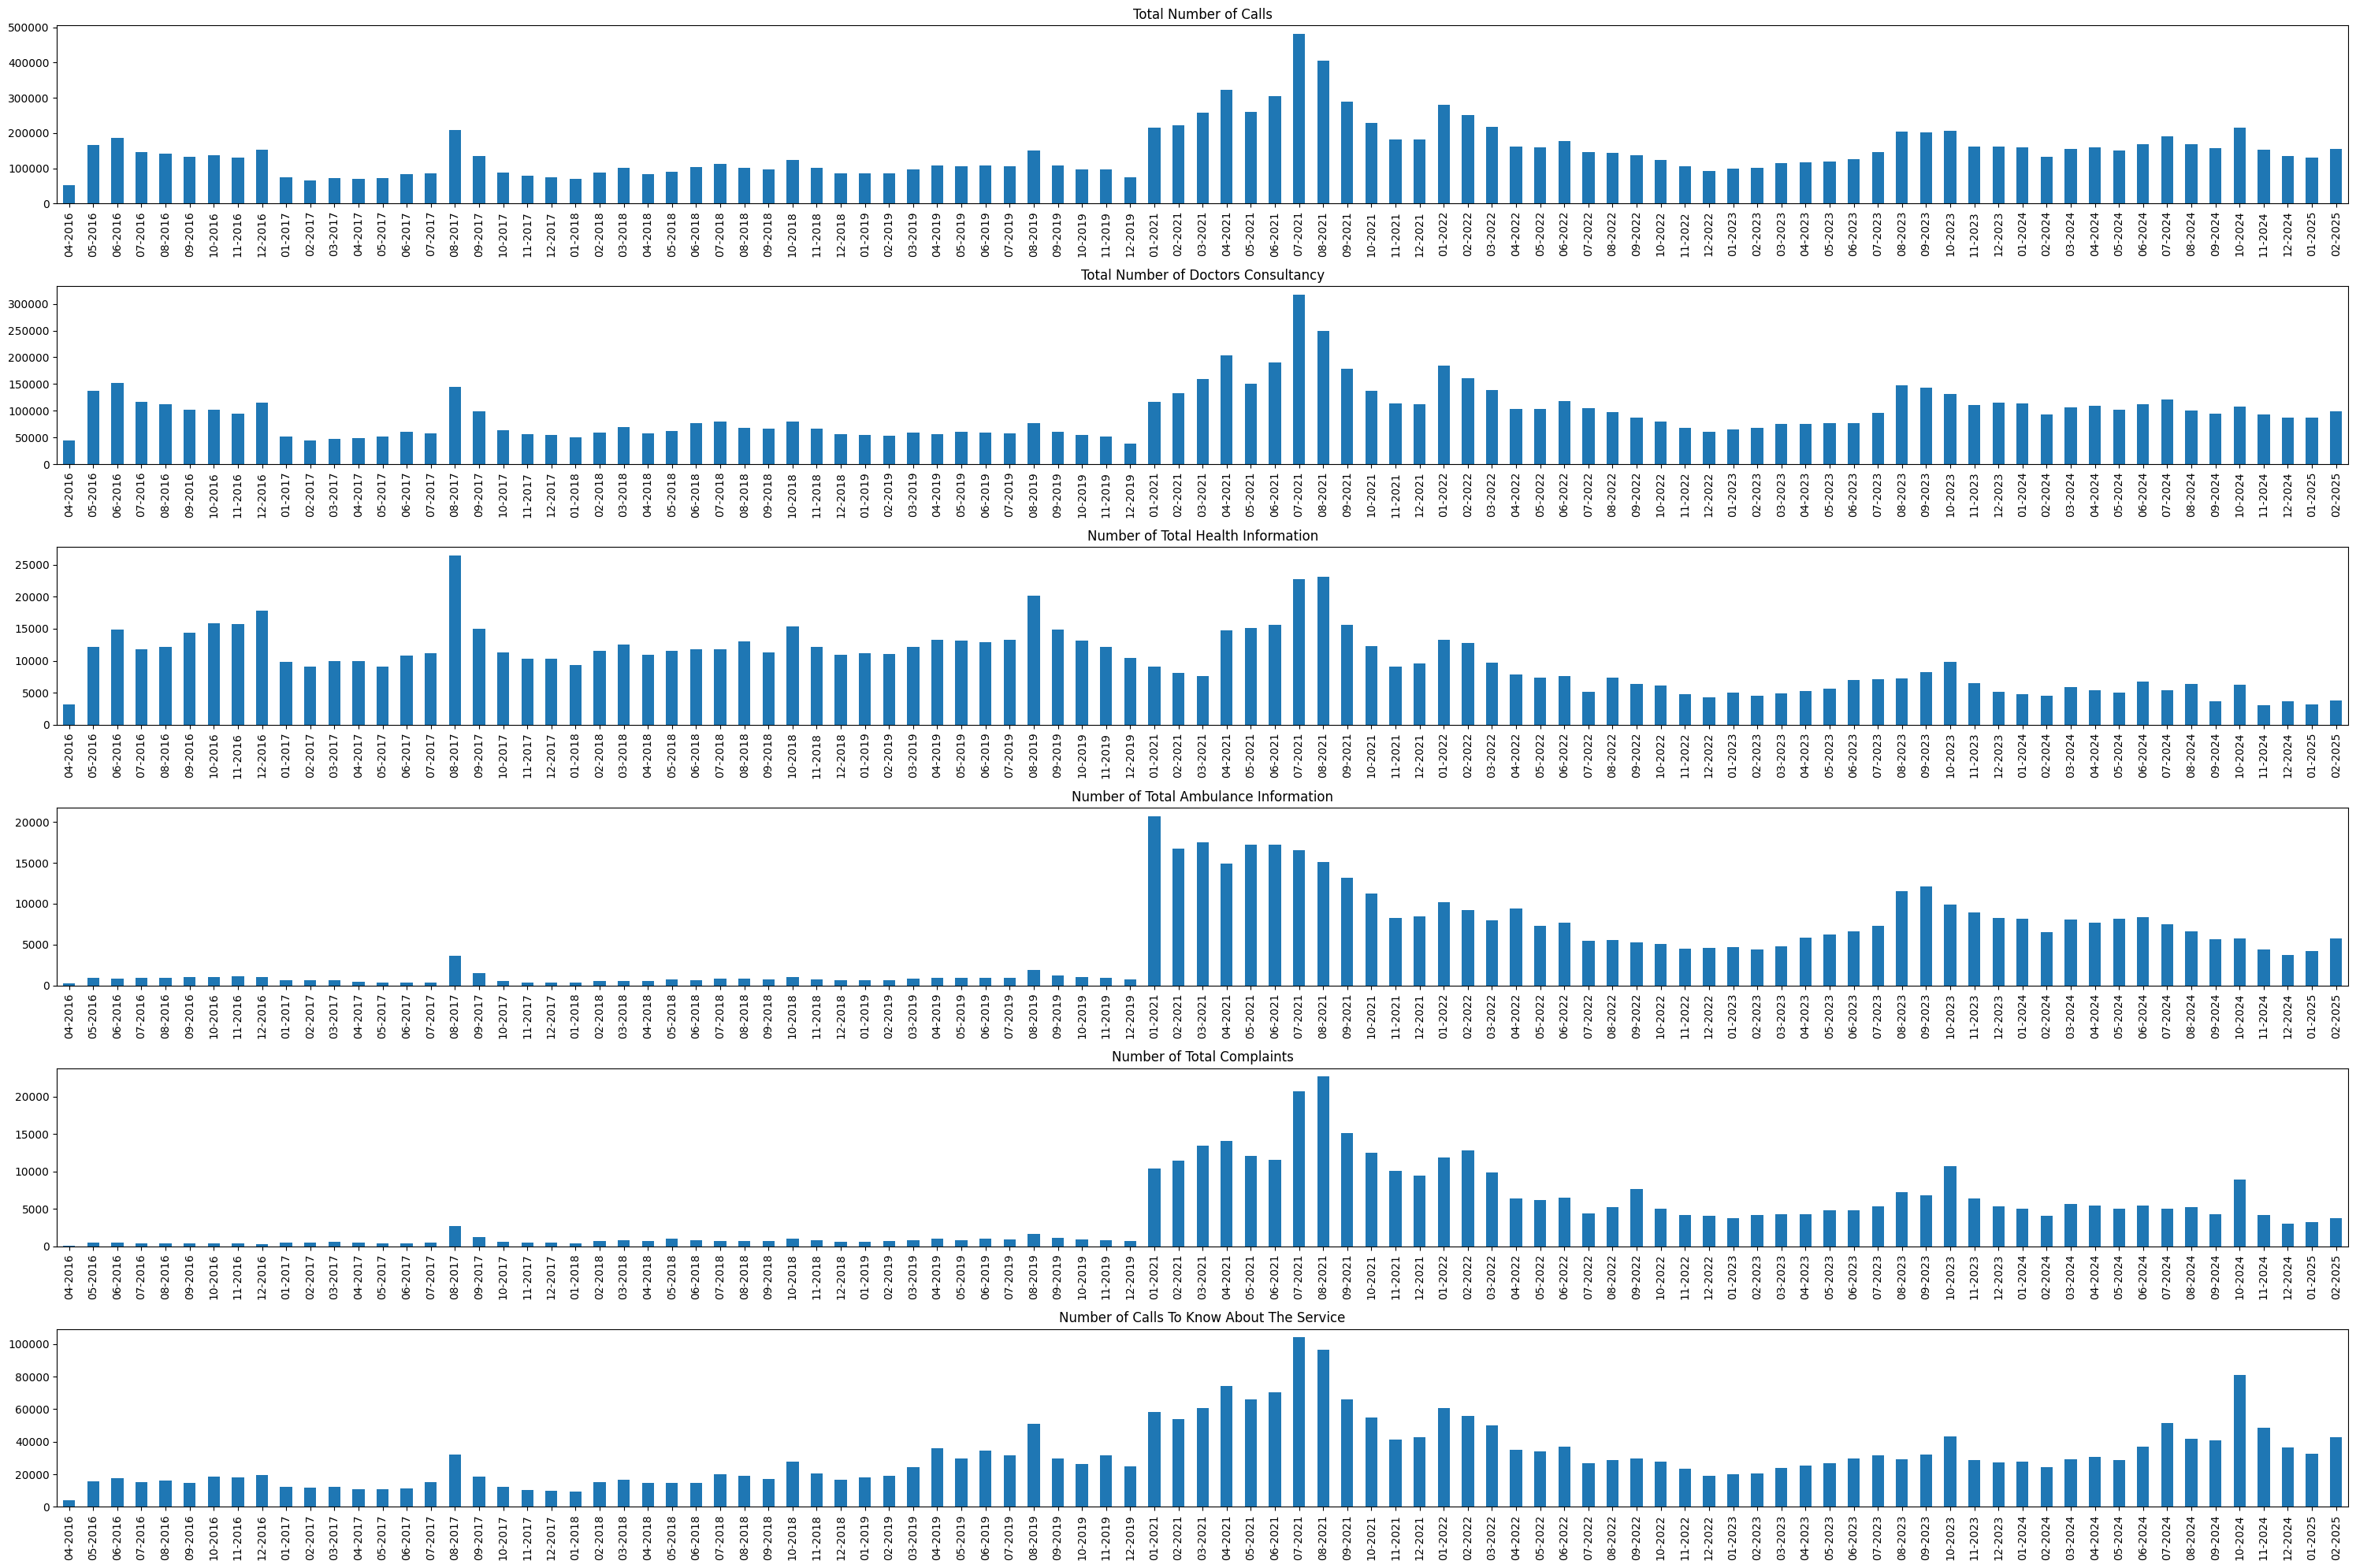

In [ ]:
# 1 remove 2020 data
# 2 obtain a general sense of the temporal patterns of the imputed data

df_no2020 = df[df['Year'] != 2020].reset_index(drop=True)

fig, axs = plt.subplots(6, 1, figsize=(30, 20), sharex=False)
axs = axs.flatten()

for i in range(len(axs)):
  df_no2020[metrics[i]].plot(ax=axs[i], kind='bar')
  axs[i].set_xticks(np.arange(len(df_no2020['Month-Year'])), df_no2020['Month-Year'].dt.strftime('%m-%Y'), rotation=90)
  axs[i].set_title(metrics[i])

plt.tight_layout()
plt.show()

Taking a closer look into the seasonality of calls on a monthly basis, we aggregate our no2020 data by month and get its plot.

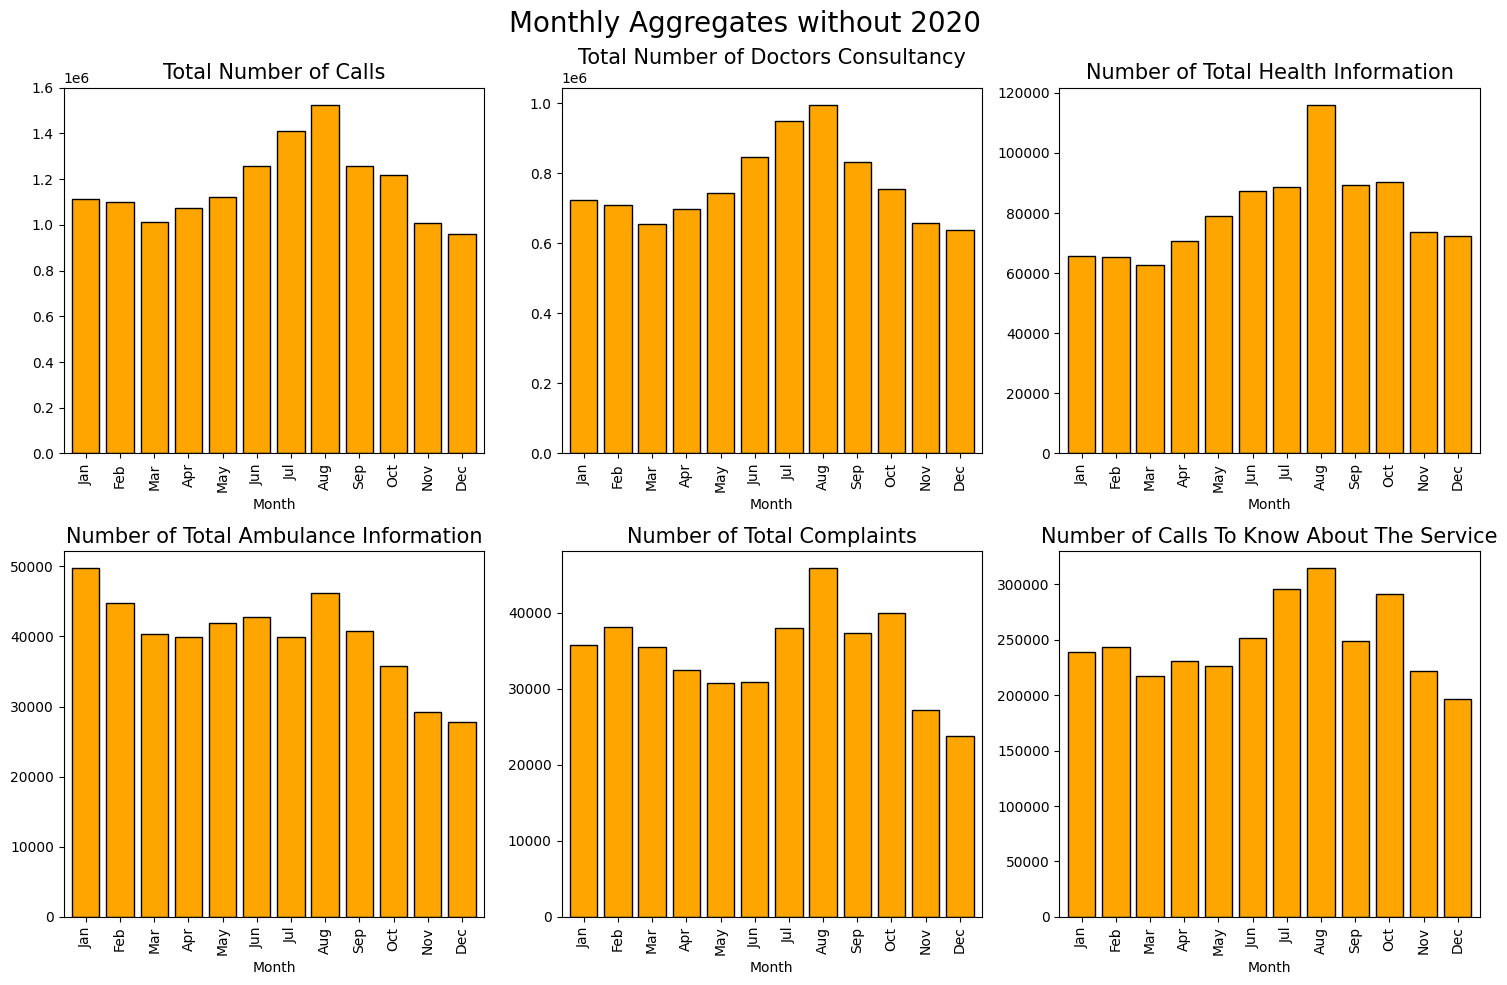

In [ ]:
df_bymonth = df_no2020[metrics.to_list() + ['Month']].groupby('Month').sum()

# arrange months in order
df_bymonth = df_bymonth.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# plot the monthly aggregates
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(len(axs)):
  df_bymonth[metrics[i]].plot(ax=axs[i], kind='bar', color='orange', width=0.8, edgecolor='black')
  axs[i].set_title(f"{metrics[i]}", fontsize=15)

plt.suptitle('Monthly Aggregates without 2020', fontsize=20)
plt.tight_layout()
plt.show()

Just to add some insights, we can also look into the call type contributions aggregated by month using a stacked area/bar chart.

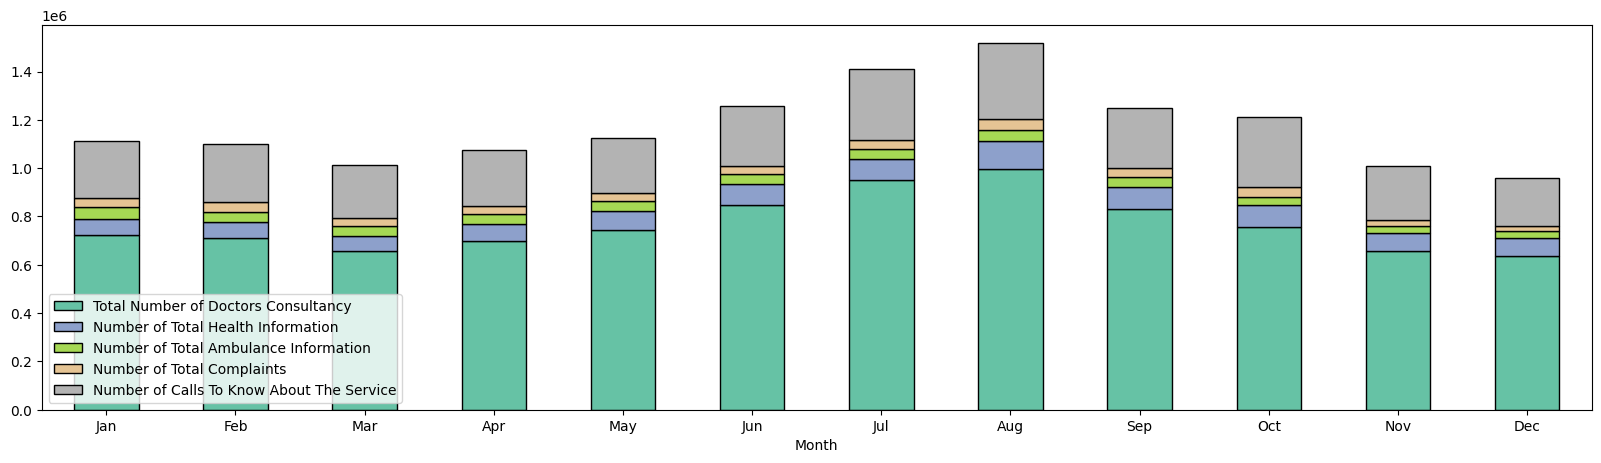

In [ ]:
from matplotlib import colormaps as cm

cmap = cm.get_cmap('Set2')
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()

df_bymonth[metrics[1:]].plot(kind='bar', stacked=True,  # change kind='area'
                             ax=ax, cmap=cmap, edgecolor='black')

plt.legend(loc='lower left')
plt.xticks(rotation=0)
plt.show()

Can we observe the same seasonality for the numbers of calls aggregated by year?

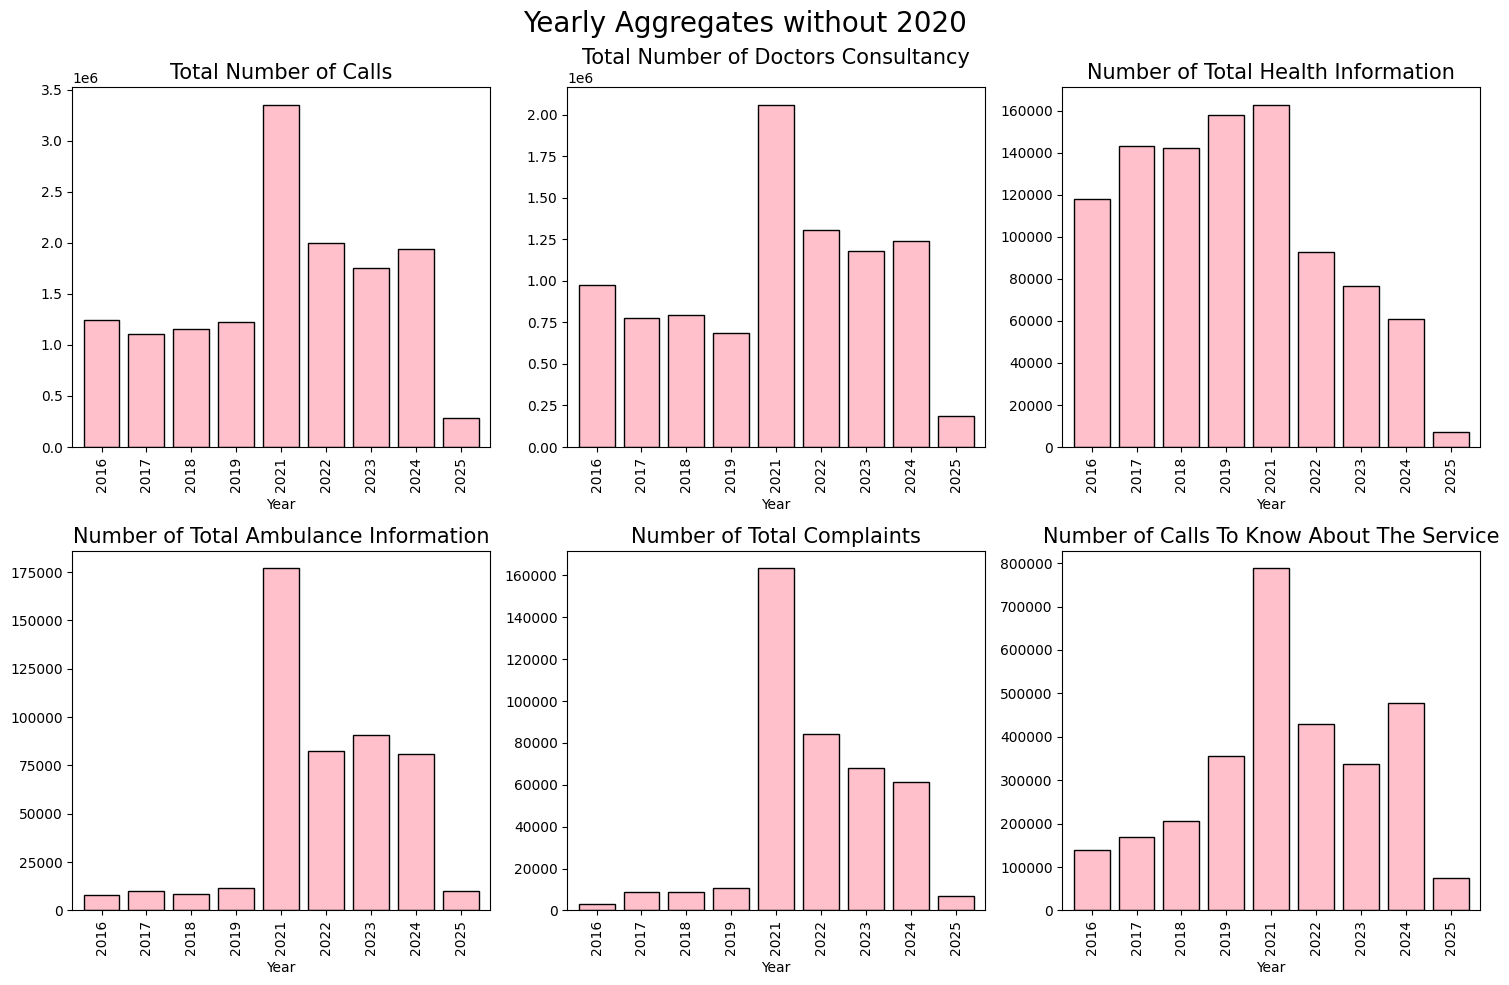

In [ ]:
# !! Answer Me !! Can we find some seasonality/trend for the number of calls aggregated by year?
df_byyear = df_no2020[metrics.to_list() + ['Year']].groupby('Year').sum()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(len(axs)):
  df_byyear[metrics[i]].plot(ax=axs[i], kind='bar', color='pink', width=0.8, edgecolor='black')
  axs[i].set_title(f"{metrics[i]}", fontsize=15)

plt.suptitle('Yearly Aggregates without 2020', fontsize=20)
plt.tight_layout()
plt.show()

Now, we want to understand: how is the overall service perception against complaints?

For this, we'll consider service inquiry calls as a form of positive feedback while complaint calls as negative. We create a new column *Service/Complaint* that takes the proportion of these two.

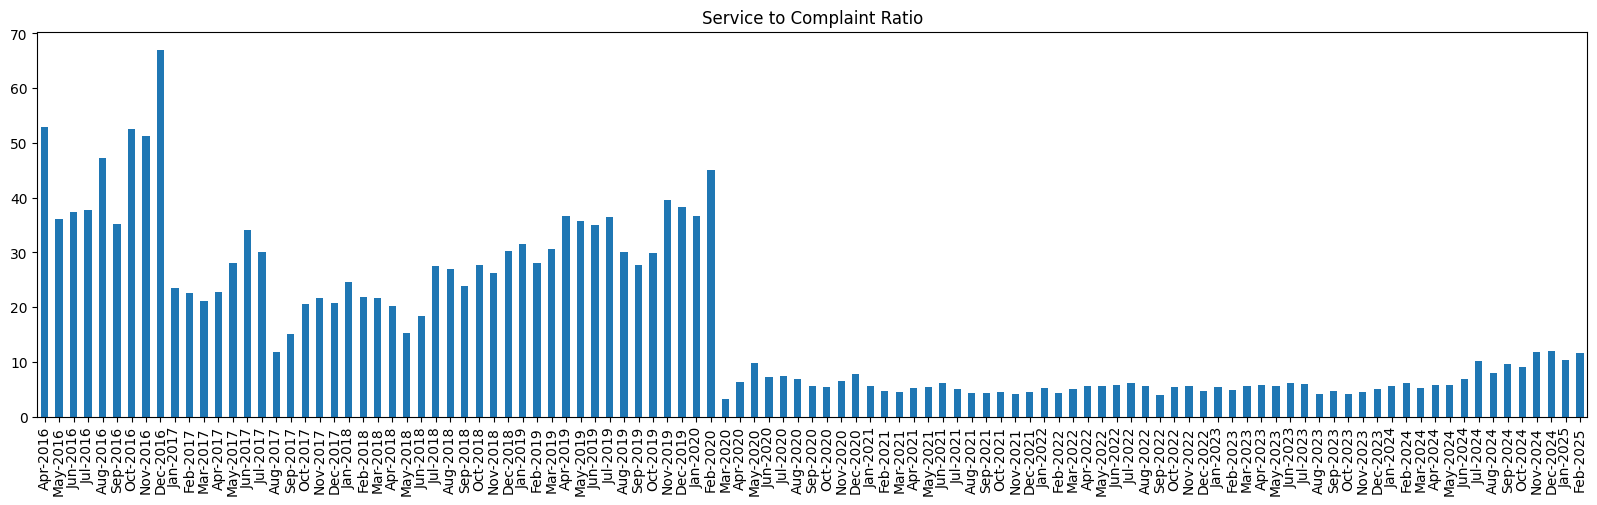

In [ ]:
df['Service/Complaint'] = df['Number of Calls To Know About The Service']/df['Number of Total Complaints']

plt.figure(figsize=(20,5))
df['Service/Complaint'].plot(kind='bar')
plt.xticks(np.arange(len(df['Month-Year'])), df['Month-Year'].dt.strftime('%b-%Y'), rotation=90)
plt.title('Service to Complaint Ratio')
plt.show()

From this plot, we notice that there is a significant drop in service to complaint ratio starting March 2020, giving insights on the effect of the pandemic to the perception of people to the healthcare services offered.

In [ ]:
# filter data to total number of calls only
df_calls = df_no2020.loc[:, ['Month-Year', 'Total Number of Calls']]

# get month and year as a datetime format
df_calls['Month'] = df_calls['Month-Year'].dt.strftime('%b')
df_calls['Year'] = df_calls['Month-Year'].dt.year

pivot_table = df_calls.pivot_table(index='Month', columns='Year',
                                   values='Total Number of Calls', aggfunc='sum',
                                   fill_value=0)


pivot_table = pivot_table.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


pivot_table.style.background_gradient(
    cmap='Blues', axis=1  # axis=None apply to entire dataframe
)

Year,2016,2017,2018,2019,2021,2022,2023,2024,2025
Month,,,,,,,,,
Jan,0,75328,69973,85355,215326,280516,98022,158854,130982
Feb,0,65846,87493,85002,222444,252123,101276,132505,155200
Mar,0,71077,100355,97763,258788,216520,113573,154481,0
Apr,51432,70740,84386,107589,321849,161798,116403,159063,0
May,166635,72436,90328,105308,261009,158578,119520,149502,0
Jun,186433,83099,104566,108310,304620,177389,125119,169089,0
Jul,145061,84562,112617,104682,481426,146040,146616,190861,0
Aug,142400,209179,100730,150908,406648,143461,203224,168418,0
Sep,132225,135247,96148,107937,288398,136822,201880,157686,0


## Future Directions

Our analysis is not limited to what we did above. We can extend this to answer specific inquiries and implement advanced analytics. The following are some ideas for future directions:
1. Cluster months with similar call distributions - can gain insights on monthly expectation per call types and aid in agent training plans.
2. In depth correlation analysis - compute for correlation coefficients and create correlation matrix heatmaps.
3. Detect abnormal spikes or drops in specific call types - can help identify the effect of similar events to the number of calls received.
4. Call volume forecasting - apply time series forecasting models such as ARIMA, Regression Analysis, and Deep network based models such as Long Short Term Memory (LSTM) to predict expected calls in the following months.
5. Customer behavior pattern mining - use association rules (Apriori algorithm) if user-level data is available.
6. and more ...